In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
tf.compat.v1.reset_default_graph()

df = pd.read_csv('house_data-20210228.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'], axis=1)

# X = preprocessing.MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)

(100594, 5490)
(100594,)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
tf.compat.v1.reset_default_graph()

model = Sequential([
    
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),

    layers.Dense(1)
])

model.compile(optimizer=Adam(0.00001), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                175712    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 219,425
Trainable params: 219,425
Non-trainable params: 0
__________________________________________________

In [9]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=15,
              epochs=100)

Epoch 1/100
6707/6707 [==============================] - 26s 4ms/step - loss: 5.6604 - val_loss: 0.1070
Epoch 2/100
6707/6707 [==============================] - 21s 3ms/step - loss: 0.1521 - val_loss: 0.0748
Epoch 3/100
6707/6707 [==============================] - 21s 3ms/step - loss: 0.1161 - val_loss: 0.0614
Epoch 4/100
6707/6707 [==============================] - 22s 3ms/step - loss: 0.0963 - val_loss: 0.0537
Epoch 5/100
6707/6707 [==============================] - 20s 3ms/step - loss: 0.0851 - val_loss: 0.0534
Epoch 6/100
6707/6707 [==============================] - 22s 3ms/step - loss: 0.0767 - val_loss: 0.0463
Epoch 7/100
6707/6707 [==============================] - 23s 3ms/step - loss: 0.0708 - val_loss: 0.0491
Epoch 8/100
6707/6707 [==============================] - 25s 4ms/step - loss: 0.0665 - val_loss: 0.0451
Epoch 9/100
6707/6707 [==============================] - 24s 4ms/step - loss: 0.0616 - val_loss: 0.0463
Epoch 10/100
6707/6707 [==============================] - 20s 3m

6707/6707 [==============================] - 17s 3ms/step - loss: 0.0042 - val_loss: 0.0113
Epoch 80/100
6707/6707 [==============================] - 17s 3ms/step - loss: 0.0040 - val_loss: 0.0103
Epoch 81/100
6707/6707 [==============================] - 17s 3ms/step - loss: 0.0042 - val_loss: 0.0112
Epoch 82/100
6707/6707 [==============================] - 17s 3ms/step - loss: 0.0040 - val_loss: 0.0126
Epoch 83/100
6707/6707 [==============================] - 18s 3ms/step - loss: 0.0041 - val_loss: 0.0122
Epoch 84/100
6707/6707 [==============================] - 18s 3ms/step - loss: 0.0039 - val_loss: 0.0117
Epoch 85/100
6707/6707 [==============================] - 17s 3ms/step - loss: 0.0039 - val_loss: 0.0120
Epoch 86/100
6707/6707 [==============================] - 17s 3ms/step - loss: 0.0038 - val_loss: 0.0119
Epoch 87/100
6707/6707 [==============================] - 17s 3ms/step - loss: 0.0038 - val_loss: 0.0125
Epoch 88/100
6707/6707 [==============================] - 17s 3ms/st

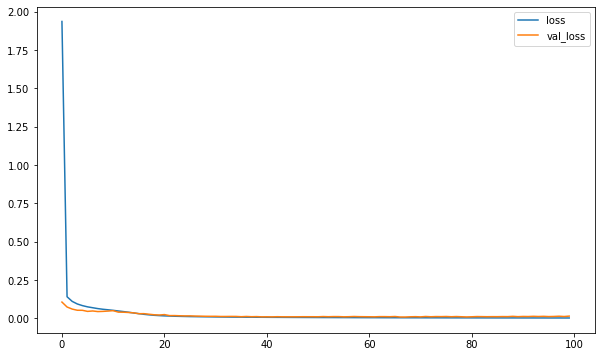

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [11]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [12]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('='*100)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.09577289709889086
MSE: 0.015552013810494756
RMSE: 0.12470771351642511
R2 Square 0.9098878470222496
Train set evaluation:
_____________________________________
MAE: 0.08972698147765074
MSE: 0.01233808997966826
RMSE: 0.11107695521424892
R2 Square 0.9301621464039302


In [12]:
result = model.evaluate(X_test, y_test)
print(result)

680/680 [==============================] - 0s 685us/step - loss: 0.0620
0.06195215508341789


In [17]:
model.save('price_model.h5')

In [18]:
# new_model = keras.models.load_model('dnn_mnist_model.h5')
# new_model.summary()